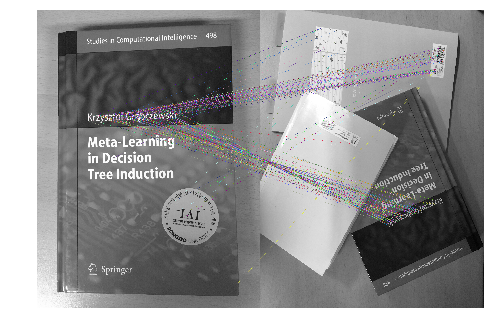

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('6.jpg',0)          # queryImage
img2 = cv2.imread('8.jpg',0) # trainImage

 # Initiate ORB detector
orb = cv2.ORB_create()

  # find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

  # create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

 # Match descriptors.
matches = bf.match(des1,des2)

 # Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

 # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches ,None, flags=2)

plt.imshow(img3)
plt.axis('off')
plt.show()

In [38]:
pip uninstall opencv-python

Uninstalling opencv-python-3.4.5.20:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.5.20.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.5.20


In [43]:
pip install -U opencv-contrib-python==3.4.0.12

    100% |████████████████████████████████| 30.5MB 1.0MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


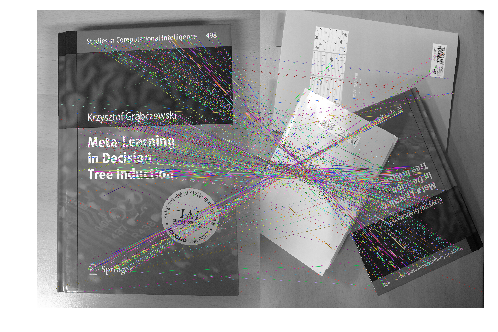

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('6.jpg',0)          # queryImage
img2 = cv2.imread('8.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

 # Match descriptors.
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3)
plt.axis('off')
plt.show()

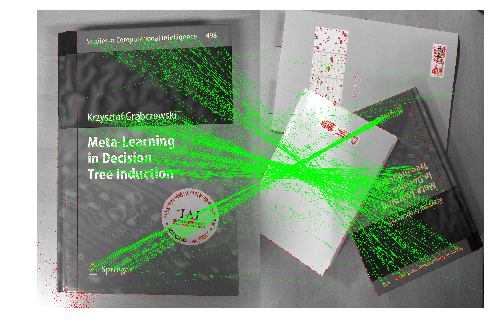

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('6.jpg',0)          # queryImage
img2 = cv2.imread('8.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3)
plt.axis('off')
plt.show()